# 1. Veri Setinin Temini ve Düzenlenmesi

Bu projede Veri Madenciliği tahminleyici yöntemlerden sınıflandırma üzerine bir çalışma yapılacaktır. Uygulamamız bir banka firması verileri üzerine olacak ve analiz için gerekli veri setinin temini kaggle.com adlı siteden yapılmıştır.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ChurnModelling.csv",sep=',',decimal='.')

In [3]:
df.rename(columns={'RowNumber':'Satır Num', 'CustomerId':'Müşteri ID', 'Surname':'Soyad', 'CreditScore':'Kredi Puanı', 'Geography':'Ülke', 'Gender':'Cinsiyet', 'Age':'Yaş', 'Tenure':'Abonelik Süresi', 'Balance':'Ortalama Bakiye', 'NumOfProducts':'Banka Ürünü Sayısı', 'HasCrCard':'Kart Sahipliği', 'IsActiveMember':'Aktif Üyelik', 'EstimatedSalary':'Tahmini Maaş', 'Exited':'Müşteri Kaybı'}, inplace=True)  

# 2. Modelleme



## 2.1. Araştırma Hedefini Belirlenmesi (Problem / Araştırma Sorusu)

Yeni müşteri kazanmak mevcut müşteriyi elde tutmaktan daha zor ve maliyetlidir. Bu yüzden şirketler önce mevcut müşterilerini korumak ister. Bunun için müşterileri kaybetmemek adına, müşterileri kaybetmeden önce tespit etmek ve önlem almak istenir. Burada devreye insan davranış faktörü girdiği için yeterli nitelikli veriye sahipseniz önceden müşteri kaybını tespit edebilir ve buna karşı önlem alabilirsiniz. Bu bağlamda gerçekleştireceğimiz projemizde,

Araştırma sorumuz,

• Müşteri kaybı, müşteri kaybı oluşmadan tespit edilebilir mi?

Araştırma sorumuz ile bu araştırmamızda hedeflediğimiz,

• Sadık müşteri kitlesinin oluşturulması.
Şeklinde olmuştur.

Analiz genel olarak şu şekilde işleyecek,
Bankamızın elinde yeterli veri bulunmaktadır, müşterilerin verileri kriterlere göre veri tabanın da kayıtlıdır.
Müşteri Kaybı analizi bankalar için çok önemlidir ve müşterilerini kaybetmeden önce tespit edip aksiyon alınmak istenir. Ay sonu veriler ile müşteri kaybı olup olmayacağı tespit edilip şirket tarafından önlemler Tespit edilen potansiyel kayıp müşterilerin elden kaçırılmaması için şirket politikaları geliştirilecektir. Böylece müşteri kaybedilmeyecek ve ucuz maliyetler ile müşteri sayısı korunmuş olacak ve piyasada ki bankamızın müşteri sayısının aslında arttırılması sağlanacaktır.


## 2.2. Analizde Kullanılacak Verisetinin İncelenmesi Ve Veri Önişleme

Analizdede kullanılmak üzere 14 öznitelikten oluşan bir müşteri veri seti temin edilmiştir, bu özniteliklerden hedef değişken “Müşteri Kaybı(Churn)” şeklinde tanımlanmıştır.

Veri setimiz 10000 satır, 14 sütundan oluşmaktadır.



In [4]:
df.head(10000)

,Satır Num,Müşteri ID,Soyad,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


RowNumber olarak geçen SatırNum kısmını verisetinin içeriğinde çok önemli olmadığı için çıkarıyoruz.

In [5]:
df.drop('Satır Num', axis=1, inplace=True)

CostumerID(Müşteri ID) kısmı gereksiz olduğu için veri setimizden çıkaralım.

In [6]:
df.drop('Müşteri ID', axis=1, inplace=True)

Grafik okurken kafa karıştırmaması için hedef sütunumuzdaki verileri türkçeleştirelim ve kategorik hale getirelim.

In [7]:
df["Müşteri Kaybı"]= df["Müşteri Kaybı"].replace(0,"Müşteri Kaybı Oluşmadı") 
df["Müşteri Kaybı"]= df["Müşteri Kaybı"].replace(1,"Müşteri Kaybı Oluştu")

Aktif Üyelik kısmını kategorik hala getirelim.

In [8]:
df["Aktif Üyelik"]= df["Aktif Üyelik"].replace(0,"Aktif Üye Değil") 
df["Aktif Üyelik"]= df["Aktif Üyelik"].replace(1,"Aktif Üye")

Kart Sahipliği kısmını kategorik hala getirelim.

In [9]:
df["Kart Sahipliği"]= df["Kart Sahipliği"].replace(0,"Kart Yok") 
df["Kart Sahipliği"]= df["Kart Sahipliği"].replace(1,"Kart Var")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soyad               10000 non-null  object 
 1   Kredi Puanı         10000 non-null  int64  
 2   Ülke                10000 non-null  object 
 3   Cinsiyet            10000 non-null  object 
 4   Yaş                 10000 non-null  int64  
 5   Abonelik Süresi     10000 non-null  int64  
 6   Ortalama Bakiye     10000 non-null  float64
 7   Banka Ürünü Sayısı  10000 non-null  int64  
 8   Kart Sahipliği      10000 non-null  object 
 9   Aktif Üyelik        10000 non-null  object 
 10  Tahmini Maaş        10000 non-null  float64
 11  Müşteri Kaybı       10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


Görüldüğü üzere integer ve float tipi verileri içeren sütunlarda istatistiksel veriler getirildi. Count değerleri eşit olduğuna göre aykırı veri bulunmamaktadır.

In [11]:
df.describe()

,Kredi Puanı,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Tahmini Maaş
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Müşteriliğini sonlandıran müşterilerin kutu grafiği oluşturularak kayıp olan ve olmayan müşteri sayıları görselleştirildi.

Müşteri Kaybı Oluşmadı    7963
Müşteri Kaybı Oluştu      2037
Name: Müşteri Kaybı, dtype: int64

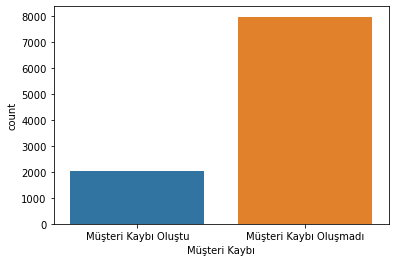

In [12]:
sns.countplot(x = "Müşteri Kaybı", data = df)
df.loc[:, 'Müşteri Kaybı'].value_counts()

Kayıp veri bulunmamaktadır.

In [13]:
df.isnull().sum()

Soyad                 0
Kredi Puanı           0
Ülke                  0
Cinsiyet              0
Yaş                   0
Abonelik Süresi       0
Ortalama Bakiye       0
Banka Ürünü Sayısı    0
Kart Sahipliği        0
Aktif Üyelik          0
Tahmini Maaş          0
Müşteri Kaybı         0
dtype: int64

In [14]:
df.drop('Soyad', axis=1, inplace=True)

Veriler kategorik ve sayısal olarak sınıflandırılmıştır. Hedef değişkenimiz olan Kayıp, kategorik alanlara dahil edilmeyecektir.

In [15]:
Kategorik = df.select_dtypes(include='object').drop('Müşteri Kaybı', axis=1).columns.tolist()
Sayısal = df.select_dtypes(exclude='object').columns.tolist()

Sınıflandırılan kategorik değişkenlere göz gezdirildi.

In [16]:
for c in Kategorik:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))

Column Ülke unique values: 3
Column Cinsiyet unique values: 2
Column Kart Sahipliği unique values: 2
Column Aktif Üyelik unique values: 2


Hedef değişkenimiz ile diğer değişkenlerin ilişkisi hakkında daha iyi bir ön fikir sahibi olmak için kategorik ve sayısal verileri grafikleştirelim.

Kategorik değişkenler kutu grafiği, sayısal değişkenler çizgi grafiği olarak görselleştirildi.

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


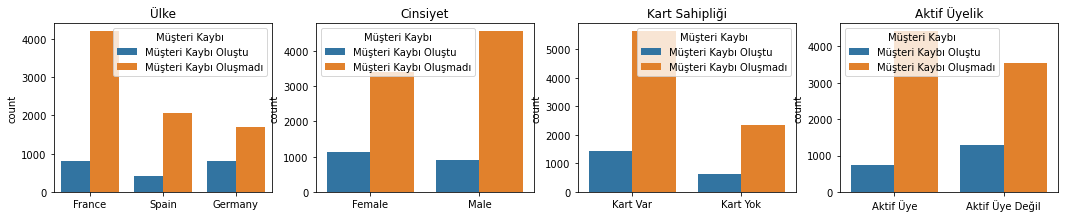

In [18]:
#Kutu grafiği ile görselleştirilme

plt.figure(figsize=(18,18))
for i,c in enumerate(Kategorik):
    plt.subplot(5,4,i+1)
    sns.countplot(df[c], hue=df['Müşteri Kaybı'])
    plt.title(c)
    plt.xlabel('')

In [19]:
for c in Sayısal:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))

Column Kredi Puanı unique values: 460
Column Yaş unique values: 70
Column Abonelik Süresi unique values: 11
Column Ortalama Bakiye unique values: 6382
Column Banka Ürünü Sayısı unique values: 4
Column Tahmini Maaş unique values: 9999


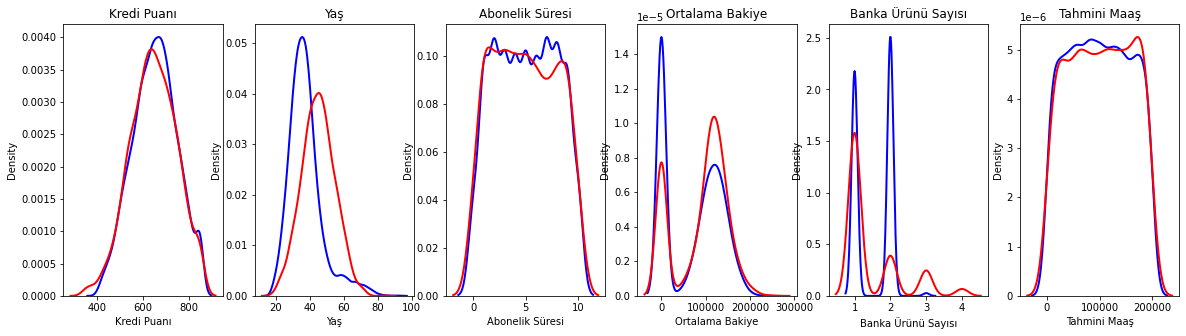

In [20]:
#Çizgi grafiği ile görselleştirme

plt.figure(figsize=(20,5))
for i,c in enumerate(['Kredi Puanı', 'Yaş', 'Abonelik Süresi', 'Ortalama Bakiye', 'Banka Ürünü Sayısı', 'Tahmini Maaş']):
    plt.subplot(1,6,i+1)
    sns.distplot(df[df['Müşteri Kaybı'] == 'Müşteri Kaybı Oluşmadı'][c], kde=True, color='blue', hist=False, kde_kws=dict(linewidth=2), label='Müşteri Kaybı Oluşmadı')
    sns.distplot(df[df['Müşteri Kaybı'] == 'Müşteri Kaybı Oluştu'][c], kde=True, color='red', hist=False, kde_kws=dict(linewidth=2), label='Müşteri Kaybı Oluştu')
    plt.title(c)

Şu ana kadar işlediğimiz verileri kontrol edelim.

In [21]:
df.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,France,Female,42,2,0.00,1,Kart Var,Aktif Üye,101348.88,Müşteri Kaybı Oluştu
1,608,Spain,Female,41,1,83807.86,1,Kart Yok,Aktif Üye,112542.58,Müşteri Kaybı Oluşmadı
2,502,France,Female,42,8,159660.80,3,Kart Var,Aktif Üye Değil,113931.57,Müşteri Kaybı Oluştu
3,699,France,Female,39,1,0.00,2,Kart Yok,Aktif Üye Değil,93826.63,Müşteri Kaybı Oluşmadı
4,850,Spain,Female,43,2,125510.82,1,Kart Var,Aktif Üye,79084.10,Müşteri Kaybı Oluşmadı
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Kart Var,Aktif Üye Değil,96270.64,Müşteri Kaybı Oluşmadı
9996,516,France,Male,35,10,57369.61,1,Kart Var,Aktif Üye,101699.77,Müşteri Kaybı Oluşmadı
9997,709,France,Female,36,7,0.00,1,Kart Yok,Aktif Üye,42085.58,Müşteri Kaybı Oluştu
9998,772,Germany,Male,42,3,75075.31,2,Kart Var,Aktif Üye Değil,92888.52,Müşteri Kaybı Oluştu


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kredi Puanı         10000 non-null  int64  
 1   Ülke                10000 non-null  object 
 2   Cinsiyet            10000 non-null  object 
 3   Yaş                 10000 non-null  int64  
 4   Abonelik Süresi     10000 non-null  int64  
 5   Ortalama Bakiye     10000 non-null  float64
 6   Banka Ürünü Sayısı  10000 non-null  int64  
 7   Kart Sahipliği      10000 non-null  object 
 8   Aktif Üyelik        10000 non-null  object 
 9   Tahmini Maaş        10000 non-null  float64
 10  Müşteri Kaybı       10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


Eksik verimiz olup olmadığına bakmıştık şimdi aykırı verileri gözlemleyelim.

<AxesSubplot:xlabel='Abonelik Süresi', ylabel='Müşteri Kaybı'>

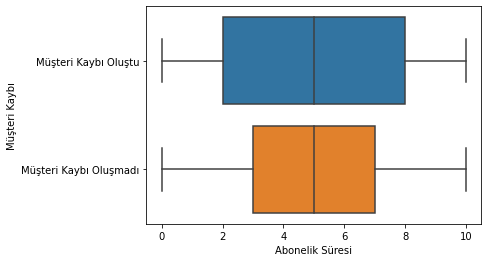

In [23]:
import seaborn as sns
sns.boxplot(x=df['Abonelik Süresi'],y=df['Müşteri Kaybı'])

<AxesSubplot:xlabel='Kredi Puanı', ylabel='Müşteri Kaybı'>

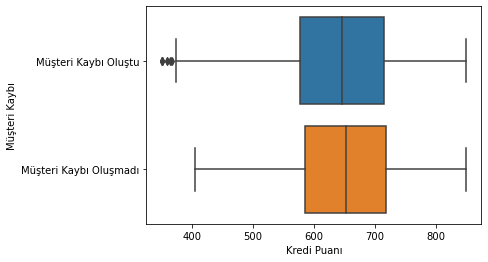

In [24]:

sns.boxplot(x=df['Kredi Puanı'],y=df['Müşteri Kaybı'])

Kredi Puanı durumu için müşteri kaybı oluşması durumunda aykırı verilerimiz bulunmaktadır. 

<AxesSubplot:xlabel='Yaş', ylabel='Müşteri Kaybı'>

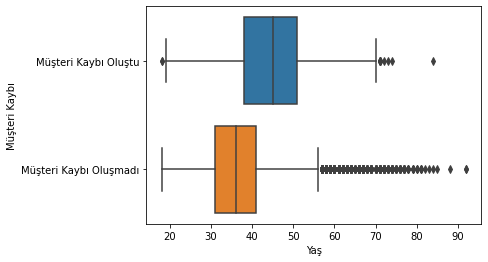

In [25]:

sns.boxplot(x=df['Yaş'],y=df['Müşteri Kaybı'])

Yaş durumu için hem müşteri kaybı oluşması durumunda hem de müşteri kaybının oluşmaması durumunda aykırı verilerimiz bulunmaktadır. 

<AxesSubplot:xlabel='Ortalama Bakiye', ylabel='Müşteri Kaybı'>

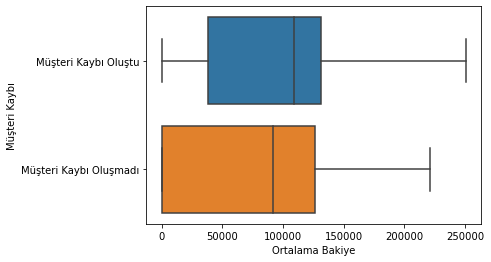

In [26]:

sns.boxplot(x=df['Ortalama Bakiye'],y=df['Müşteri Kaybı'])

<AxesSubplot:xlabel='Banka Ürünü Sayısı', ylabel='Müşteri Kaybı'>

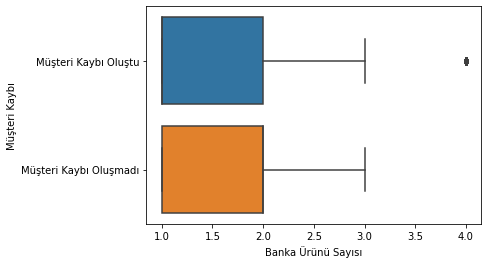

In [27]:

sns.boxplot(x=df['Banka Ürünü Sayısı'],y=df['Müşteri Kaybı'])

Banka Ürünü Sayısı durumu için müşteri kaybı oluşması durumunda aykırı verilerimiz bulunmaktadır.

<AxesSubplot:xlabel='Tahmini Maaş', ylabel='Müşteri Kaybı'>

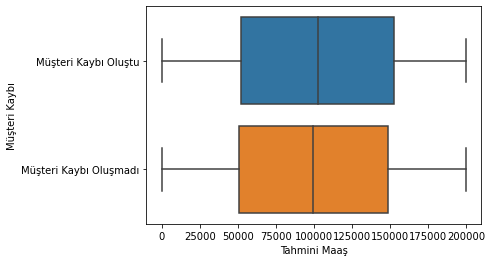

In [28]:

sns.boxplot(x=df['Tahmini Maaş'],y=df['Müşteri Kaybı'])

Yukarıda belirtilen grafiklerden yola çıkılarak aykırı veriler tespit edilmiştir. Şimdi aykırı verilerimi temizleyelim. Öncelikle verileri labelencoder ile tamamen sayısal hale getiriceğiz.

In [29]:
from sklearn.preprocessing import LabelEncoder
encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


### Yaş için aykırı verilerin tespit edilip çıkarılması

In [30]:
Müşteri_Kaybı_Yaşanmadı=encoded.loc[encoded['Müşteri Kaybı'].abs()<1]
Müşteri_Kaybı_Yaşanmadı

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
6,822,0,1,50,7,0.00,2,0,0,10062.80,0
8,501,0,1,44,4,142051.07,2,1,0,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,0,1,28,7,155060.41,1,0,1,29179.52,0
9994,800,0,0,29,2,0.00,2,1,1,167773.55,0
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0


In [31]:
Q1 = Müşteri_Kaybı_Yaşanmadı['Yaş'].quantile(0.25)
Q3 = Müşteri_Kaybı_Yaşanmadı['Yaş'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.0

In [32]:
Q=Q3+(1.5*IQR)
Q

56.0

In [33]:
encoded_out = encoded[~((encoded['Yaş'] < (Q3 + 1.5 * IQR)))&(encoded['Müşteri Kaybı']<1)]
encoded_out.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
42,556,0,0,61,2,117419.35,1,0,0,94153.83,0
44,660,2,0,61,5,155931.11,1,0,0,158338.39,0
63,684,2,1,56,8,78707.16,1,0,0,99398.36,0
85,652,2,0,75,10,0.00,2,0,0,114675.75,0
158,646,0,0,73,6,97259.25,1,1,0,104719.66,0
...,...,...,...,...,...,...,...,...,...,...,...
9901,706,1,0,56,3,139603.22,1,0,0,86383.61,0
9909,739,0,1,58,2,101579.28,1,0,0,72168.53,0
9936,609,0,1,77,1,0.00,1,1,0,18708.76,0
9939,693,2,0,57,9,0.00,2,0,0,135502.77,0


506 tane aykırı verimiz varmış, şimdi bunları veri setinden çıkaracağız.

In [34]:
encoded.drop(encoded[~((encoded['Yaş'] < (Q3 + 1.5 * IQR)))&(encoded['Müşteri Kaybı']<1)].index, inplace=True)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


Aykırı verilerin çıkarımları sonucunda 9494 tane verimiz kalmıştır.

Yaş kategorisi için müşteri kaybının yaşanması durumundaki aykırı verileri gözlemleyelim.

In [35]:
Müşteri_Kaybı_Yaşandı=encoded.loc[encoded['Müşteri Kaybı'].abs()>0]
Müşteri_Kaybı_Yaşandı

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
5,645,2,1,44,8,113755.78,2,0,1,149756.71,1
7,376,1,0,29,4,115046.74,4,0,1,119346.88,1
16,653,1,1,58,1,132602.88,1,0,1,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,0,0,53445.17,1
9982,655,1,0,46,7,137145.12,1,0,1,115146.40,1
9991,597,0,0,53,4,88381.21,1,0,1,69384.71,1
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1


In [36]:
Q1_A = Müşteri_Kaybı_Yaşandı['Yaş'].quantile(0.25)
Q3_A = Müşteri_Kaybı_Yaşandı['Yaş'].quantile(0.75)
IQR_A = Q3_A - Q1_A
IQR_A

13.0

In [37]:
Q_A=Q3_A+(1.5*IQR_A)
Q_A

70.5

In [38]:
encoded_A_out = encoded[~((encoded['Yaş'] < (Q3_A + 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)]
encoded_A_out.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
1410,523,0,0,73,7,0.00,2,1,1,130883.90,1
2553,727,2,1,71,8,0.00,1,0,0,198446.91,1
3110,546,1,0,74,8,114888.74,2,0,0,66732.63,1
3317,779,0,1,71,3,0.00,2,0,0,146895.36,1
3531,408,0,0,84,8,87873.39,1,1,1,188484.52,1
5664,667,2,1,71,4,137260.78,1,1,0,94433.08,1
6581,576,1,0,71,6,140273.47,1,0,0,193135.25,1
7058,624,0,0,71,4,170252.05,3,0,0,73679.59,1
7499,609,1,0,71,6,113317.10,1,0,1,108258.22,1
9555,782,1,0,72,5,148666.99,1,0,1,2605.65,1


11 tane müşteri kaybı oluşanların verisi var

In [39]:
encoded.drop(encoded[~((encoded['Yaş'] < (Q3_A + 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)].index, inplace=True)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


11 tane aykırı veri çıkarıldı.

In [40]:
Müşteri_Kaybı_Yaşandı=encoded.loc[encoded['Müşteri Kaybı'].abs()>0]
Müşteri_Kaybı_Yaşandı

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
5,645,2,1,44,8,113755.78,2,0,1,149756.71,1
7,376,1,0,29,4,115046.74,4,0,1,119346.88,1
16,653,1,1,58,1,132602.88,1,0,1,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,0,0,53445.17,1
9982,655,1,0,46,7,137145.12,1,0,1,115146.40,1
9991,597,0,0,53,4,88381.21,1,0,1,69384.71,1
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1


In [41]:
Q1_A = Müşteri_Kaybı_Yaşandı['Yaş'].quantile(0.25)
Q3_A = Müşteri_Kaybı_Yaşandı['Yaş'].quantile(0.75)
IQR_A = Q3_A - Q1_A
IQR_A

13.0

In [42]:
Q_A=Q1_A-(1.5*IQR_A)
Q_A

18.5

In [43]:
encoded_A_out = encoded[~((encoded['Yaş'] > (Q1_A - 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)]
encoded_A_out.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
2141,674,0,1,18,7,0.0,2,0,0,55753.12,1
9572,644,2,1,18,7,0.0,1,1,0,59645.24,1


2 tane aykırı veri tespit edildi.

In [44]:
encoded.drop(encoded[~((encoded['Yaş'] > (Q1_A - 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)].index, inplace=True)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


2 tane aykırı veri çıkarıldı.

### Kredi Puanı için aykırı verilerin tespit edilip çıkarılması

In [45]:
Müşteri_Kaybı_Yaşandı=encoded.loc[encoded['Müşteri Kaybı'].abs()>0]
Müşteri_Kaybı_Yaşandı

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
5,645,2,1,44,8,113755.78,2,0,1,149756.71,1
7,376,1,0,29,4,115046.74,4,0,1,119346.88,1
16,653,1,1,58,1,132602.88,1,0,1,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,0,0,53445.17,1
9982,655,1,0,46,7,137145.12,1,0,1,115146.40,1
9991,597,0,0,53,4,88381.21,1,0,1,69384.71,1
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1


In [46]:
Q1 = Müşteri_Kaybı_Yaşandı['Kredi Puanı'].quantile(0.25)
Q3 = Müşteri_Kaybı_Yaşandı['Kredi Puanı'].quantile(0.75)
IQR = Q3 - Q1
IQR

138.0

In [47]:
Q=Q1-(1.5*IQR)
Q

371.0

In [48]:
encoded_A_out = encoded[~((encoded['Kredi Puanı'] > (Q1 - 1.5 * IQR)))&(encoded['Müşteri Kaybı']>0)]
encoded_A_out.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
1193,363,2,0,28,6,146098.43,3,0,1,100615.14,1
1405,359,0,0,44,6,128747.69,1,0,1,146955.71,1
1631,350,2,1,54,1,152677.48,1,0,0,191973.49,1
1838,350,1,1,39,0,109733.20,2,1,1,123602.11,1
1962,358,2,0,52,8,143542.36,3,0,1,141959.11,1
2473,351,1,0,57,4,163146.46,1,0,1,169621.69,1
2579,365,1,1,30,0,127760.07,1,0,1,81537.85,1
8154,367,2,1,42,6,93608.28,1,0,1,168816.73,1
8723,350,0,1,51,10,0.00,1,0,0,125823.79,1
8762,350,0,0,60,3,0.00,1,1,1,113796.15,1


11 tane aykırı verimiz var.

In [49]:
encoded.drop(encoded[~((encoded['Kredi Puanı'] > (Q1 - 1.5 * IQR)))&(encoded['Müşteri Kaybı']>0)].index, inplace=True)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


11 aykırı veri çıkarıldı.

### Banka Ürünü Sayısı için aykırı verilerin tespit edilip çıkarılması

In [50]:
Müşteri_Kaybı_Yaşandı=encoded.loc[encoded['Müşteri Kaybı'].abs()>0]
Müşteri_Kaybı_Yaşandı

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
5,645,2,1,44,8,113755.78,2,0,1,149756.71,1
7,376,1,0,29,4,115046.74,4,0,1,119346.88,1
16,653,1,1,58,1,132602.88,1,0,1,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,0,0,53445.17,1
9982,655,1,0,46,7,137145.12,1,0,1,115146.40,1
9991,597,0,0,53,4,88381.21,1,0,1,69384.71,1
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1


In [51]:
Q1_A = Müşteri_Kaybı_Yaşandı['Banka Ürünü Sayısı'].quantile(0.25)
Q3_A = Müşteri_Kaybı_Yaşandı['Banka Ürünü Sayısı'].quantile(0.75)
IQR_A = Q3_A - Q1_A
IQR_A

1.0

In [52]:
Q_A=Q3_A+(1.5*IQR_A)
Q_A

3.5

In [53]:
encoded_A_out = encoded[~((encoded['Banka Ürünü Sayısı'] < (Q3_A + 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)]
encoded_A_out.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
7,376,1,0,29,4,115046.74,4,0,1,119346.88,1
70,738,1,1,58,2,133745.44,4,0,1,28373.86,1
1254,628,0,0,46,1,46870.43,4,0,1,31272.14,1
1469,819,1,0,49,1,120656.86,4,1,1,166164.30,1
1488,596,2,1,30,6,121345.88,4,0,1,41921.75,1
1701,792,0,1,50,9,0.00,4,0,0,194700.81,1
1876,640,1,1,39,9,131607.28,4,1,0,6981.43,1
2124,704,0,1,32,7,127785.17,4,1,1,184464.70,1
2196,773,1,1,47,2,118079.47,4,0,0,143007.49,1
2285,630,1,1,50,3,129370.91,4,0,0,47775.34,1


In [54]:
encoded.drop(encoded[~((encoded['Banka Ürünü Sayısı'] < (Q3_A + 1.5 * IQR_A)))&(encoded['Müşteri Kaybı']>0)].index, inplace=True)
encoded.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş,Müşteri Kaybı
0,619,0,0,42,2,0.00,1,0,0,101348.88,1
1,608,2,0,41,1,83807.86,1,1,0,112542.58,0
2,502,0,0,42,8,159660.80,3,0,1,113931.57,1
3,699,0,0,39,1,0.00,2,1,1,93826.63,0
4,850,2,0,43,2,125510.82,1,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,0,1,96270.64,0
9996,516,0,1,35,10,57369.61,1,0,0,101699.77,0
9997,709,0,0,36,7,0.00,1,1,0,42085.58,1
9998,772,1,1,42,3,75075.31,2,0,1,92888.52,1


60 aykırı tespit edilip veri çıkarıldı.

# 3. Test ve Eğitim Verilerinin Hazırlanması


Bu aşamada hedef değişkeni tanımlanan ve algoritma öncesi son halini alan verinin test ve eğitim olarak ikiye ayrılma işlemidir. Bu işlem için uygun olan ayırma eşiği 85-15 olarak uygun görülmüştür.

Genel bir gösterim olması amacıyla aşağıda bir test ve eğitim verilerinin ayrılması işlemlerini göstereceğiz.Test algoritmalarını uygulamadan önce teste göre işlemler yaptıktan sonra bu adımları uygulayacağız.

In [55]:
x = df.drop('Müşteri Kaybı', axis = 1)              
y = df['Müşteri Kaybı'] 

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.85, random_state = 400)

In [57]:
x_test.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş
4952,679,Spain,Male,58,9,109327.65,1,Kart Var,Aktif Üye,3829.13
2796,697,France,Female,39,6,151553.19,1,Kart Var,Aktif Üye,44946.29
4029,501,Germany,Male,27,4,95331.83,2,Kart Var,Aktif Üye Değil,132104.76
3408,832,Germany,Female,40,9,107648.94,2,Kart Var,Aktif Üye,134638.97
8441,624,France,Female,23,5,0.00,2,Kart Yok,Aktif Üye Değil,132418.59
...,...,...,...,...,...,...,...,...,...,...
9434,638,Spain,Female,34,7,0.00,2,Kart Yok,Aktif Üye Değil,3946.29
3678,797,France,Male,30,10,69413.44,1,Kart Var,Aktif Üye,74637.57
3350,670,Spain,Male,35,2,124268.64,2,Kart Yok,Aktif Üye,84321.03
4058,557,France,Male,39,8,146200.01,1,Kart Var,Aktif Üye Değil,177944.64


In [58]:
x_train.head(10000)

,Kredi Puanı,Ülke,Cinsiyet,Yaş,Abonelik Süresi,Ortalama Bakiye,Banka Ürünü Sayısı,Kart Sahipliği,Aktif Üyelik,Tahmini Maaş
3623,695,Germany,Male,27,6,125552.96,1,Kart Var,Aktif Üye Değil,105291.26
3710,645,France,Male,30,1,125739.26,1,Kart Var,Aktif Üye,193441.23
6234,540,France,Male,37,6,0.00,2,Kart Var,Aktif Üye Değil,141998.89
687,769,Germany,Female,45,5,126674.81,1,Kart Var,Aktif Üye Değil,124118.71
5098,550,Germany,Male,29,9,145294.08,2,Kart Var,Aktif Üye Değil,147484.13
...,...,...,...,...,...,...,...,...,...,...
5107,847,Spain,Female,37,9,112712.17,1,Kart Var,Aktif Üye Değil,116097.26
140,756,Germany,Male,44,10,137452.09,1,Kart Var,Aktif Üye Değil,189543.90
2366,672,France,Male,34,9,0.00,2,Kart Var,Aktif Üye Değil,161800.77
3535,662,Spain,Male,37,5,94901.09,1,Kart Var,Aktif Üye,48233.75


In [59]:
y_test.head(10000)

4952    Müşteri Kaybı Oluşmadı
2796    Müşteri Kaybı Oluşmadı
4029    Müşteri Kaybı Oluşmadı
3408    Müşteri Kaybı Oluşmadı
8441    Müşteri Kaybı Oluşmadı
                 ...          
9434    Müşteri Kaybı Oluşmadı
3678    Müşteri Kaybı Oluşmadı
3350    Müşteri Kaybı Oluşmadı
4058    Müşteri Kaybı Oluşmadı
9541    Müşteri Kaybı Oluşmadı
Name: Müşteri Kaybı, Length: 8500, dtype: object

In [60]:
y_train.head(10000)

3623    Müşteri Kaybı Oluşmadı
3710    Müşteri Kaybı Oluşmadı
6234    Müşteri Kaybı Oluşmadı
687       Müşteri Kaybı Oluştu
5098    Müşteri Kaybı Oluşmadı
                 ...          
5107    Müşteri Kaybı Oluşmadı
140     Müşteri Kaybı Oluşmadı
2366    Müşteri Kaybı Oluşmadı
3535    Müşteri Kaybı Oluşmadı
4444    Müşteri Kaybı Oluşmadı
Name: Müşteri Kaybı, Length: 1500, dtype: object

# 4. Sınıflandırılma Algoritmalarının Uygulanması ve Performans Analizleri¶

Müşteri kayıplarının tespiti için sınıflandırma algoritmalarınıkullanacağız. Uygulamamızda dört sınıflandırma algoritması veriye uygulanacak ve performans çıktıları analiz edilecektir.Bu performans çıktıları ise 5.bölümde kıyaslanarak, kullanılması en uygun olan sınıflandıma algoritması belirlenecektir.



#### Bu dört sınıflandırma algoritması;
Lojistik Regresyon

Naive Bayes

Karar Ağacı

K-NN(En Yakın Komşu)

## 4.1. Logistic Regression


Lojistik regresyon, çıktı değişkeninin kesikli değerler aldığı durumlarda geçerlidir.
Verilerimizin içinde ikiden çok seçeneği olan sütunlar olduğu için çoklu lojistik regresyon kullanacağız.

Lojistik regresyona başlamadan önce küçük bir korelasyon analizi yaparak işimize yaramayan sütunları atalım.

In [61]:
x=encoded['Kredi Puanı']
y=encoded['Müşteri Kaybı']
print('Kredi Puanı:', x.corr(y)*100)
x=encoded['Yaş']
y=encoded['Müşteri Kaybı']
print('Yaş:', x.corr(y)*100)
x=encoded['Cinsiyet']
y=encoded['Müşteri Kaybı']
print('Cinsiyet:', x.corr(y)*100)
x=encoded['Ortalama Bakiye']
y=encoded['Müşteri Kaybı']
print('Ortalama Bakiye:', x.corr(y)*100)
x=encoded['Abonelik Süresi']
y=encoded['Müşteri Kaybı']
print('Abonelik Süresi:', x.corr(y)*100)
x=encoded['Banka Ürünü Sayısı']
y=encoded['Müşteri Kaybı']
print('Banka Ürünü Sayısı:', x.corr(y)*100)
x=encoded['Kart Sahipliği']
y=encoded['Müşteri Kaybı']
print('Kart Sahipliği:', x.corr(y)*100)
x=encoded['Aktif Üyelik']
y=encoded['Müşteri Kaybı']
print('Aktif Üyelik:', x.corr(y)*100)
x=encoded['Tahmini Maaş']
y=encoded['Müşteri Kaybı']
print('Tahmini Maaş:', x.corr(y)*100)


Kredi Puanı: -2.1090538944134485
Yaş: 43.65093120026767
Cinsiyet: -10.564808534631288
Ortalama Bakiye: 11.82741556860111
Abonelik Süresi: -1.7215327749993687
Banka Ürünü Sayısı: -10.946693009155036
Kart Sahipliği: 0.6691607509636275
Aktif Üyelik: 13.917159656919651
Tahmini Maaş: 0.7449973800511444


In [62]:
#encoded.drop('Cinsiyet', axis=1, inplace=True)
encoded.drop('Kredi Puanı', axis=1, inplace=True)
encoded.drop('Abonelik Süresi', axis=1, inplace=True)
#encoded.drop('Banka Ürünü Sayısı', axis=1, inplace=True)
encoded.drop('Tahmini Maaş', axis=1, inplace=True)
encoded.drop('Kart Sahipliği', axis=1, inplace=True)

Korelasyon sonucu 10 dan düşük olan sütunları attık. Korelasyon sonucunda da cinsiyet ve banka ürünü sayısının müşteri kaybına etkisini görüyoruz.

In [63]:
x=encoded.drop('Müşteri Kaybı',axis=1)
y=encoded['Müşteri Kaybı']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.85, random_state=43)

In [65]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [66]:
sc=StandardScaler()

In [67]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

Multinomial lojistik regresyon, solver olarak sadece newton-cg ve lbfgs yi desteklemektedir.Bu durumda penalty=l2 mecburi seçenek olarak geçmektedir.

In [69]:
Logistic_Regression = LogisticRegression(C=0.5,tol=0.1,multi_class='multinomial',solver='newton-cg',penalty='l2',max_iter=100)
Logistic_Regression.fit(x_train, y_train)

LogisticRegression(C=0.5, multi_class='multinomial', solver='newton-cg',
                   tol=0.1)

In [70]:
y_pred=Logistic_Regression.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [72]:
classification_report(y_true= y_test, y_pred=y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.90      6321\n           1       0.75      0.35      0.48      1678\n\n    accuracy                           0.84      7999\n   macro avg       0.80      0.66      0.69      7999\nweighted avg       0.83      0.84      0.82      7999\n'

In [73]:
accuracy_score(y_test, y_pred)*100

83.91048881110139

In [74]:
confusion_matrix(y_test, y_pred)

array([[6121,  200],
       [1087,  591]], dtype=int64)

# 4.2 Naive Bayes

Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır.
Naive Bayes, 3 gruba ayrılır;

GaussianNB

MultinomialNB

BernoulliNB

## 4.2.1. GaussianNB

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
NBG = GaussianNB()
NBG.fit(x_train, y_train)
y_tahmin = NBG.predict(x_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.85, random_state=42)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("Navy Bayes Gaussian Doğruluk Skoru:",accuracy_score(y_test, y_tahmin))
print("Karışıklık Matrisi:",confusion_matrix(y_test, y_tahmin))
print("Sınıflandırma Raporu:", classification_report(y_test, y_tahmin))

x_train: (1411, 6)
x_test: (7999, 6)
y_train: (1411,)
y_test: (7999,)
Navy Bayes Gaussian Doğruluk Skoru: 0.7305913239154894
Karışıklık Matrisi: [[5656  667]
 [1488  188]]
Sınıflandırma Raporu:               precision    recall  f1-score   support

           0       0.79      0.89      0.84      6323
           1       0.22      0.11      0.15      1676

    accuracy                           0.73      7999
   macro avg       0.51      0.50      0.49      7999
weighted avg       0.67      0.73      0.70      7999



## 4.2.2. MultinomialNB

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
NBM = MultinomialNB()
NBM.fit(x_train, y_train)
y_tahmin = NBM.predict(x_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.85, random_state=42)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print("Navy Bayes Multinomial Doğruluk Skoru :",accuracy_score(y_test, y_tahmin))
print("Karışıklık Matrisi :",confusion_matrix(y_test, y_tahmin))
print("Sınıflandırma Raporu :",classification_report(y_test, y_tahmin))

x_train:  (1411, 6)
x_test:  (7999, 6)
y_train:  (1411,)
y_test:  (7999,)
Navy Bayes Multinomial Doğruluk Skoru : 0.7279659957494686
Karışıklık Matrisi : [[5480  843]
 [1333  343]]
Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       0.80      0.87      0.83      6323
           1       0.29      0.20      0.24      1676

    accuracy                           0.73      7999
   macro avg       0.55      0.54      0.54      7999
weighted avg       0.70      0.73      0.71      7999



In [77]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 4.2.3. BernoulliNB

In [78]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [79]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
NBB = BernoulliNB()
NBB.fit(x_train, y_train)
y_tahmin = NBB.predict(x_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.85, random_state=42)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print("Navy Bayes Bernoulli Doğruluk Skoru :",accuracy_score(y_test, y_tahmin))
print("Karışıklık Matrisi :",confusion_matrix(y_test, y_tahmin))
print("Sınıflandırma Raporu :",classification_report(y_test, y_tahmin))

x_train:  (1411, 6)
x_test:  (7999, 6)
y_train:  (1411,)
y_test:  (7999,)
Navy Bayes Bernoulli Doğruluk Skoru : 0.7904738092261533
Karışıklık Matrisi : [[6323    0]
 [1676    0]]
Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       0.79      1.00      0.88      6323
           1       0.00      0.00      0.00      1676

    accuracy                           0.79      7999
   macro avg       0.40      0.50      0.44      7999
weighted avg       0.62      0.79      0.70      7999



# 4.2. Karar Ağacı

In [80]:
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
encoded['Yaş'] = est.fit_transform(encoded['Yaş'].values.reshape(-1,1))

In [81]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [82]:
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
encoded['Ortalama Bakiye'] = est.fit_transform(encoded['Ortalama Bakiye'].values.reshape(-1,1))

In [83]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [84]:
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
encoded['Aktif Üyelik'] = est.fit_transform(encoded['Aktif Üyelik'].values.reshape(-1,1))

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as KarışıklıkMatrisi

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.85, random_state=42)
Karar_Ağacı = DecisionTreeClassifier(max_depth = 4, random_state=42)
Karar_Ağacı.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

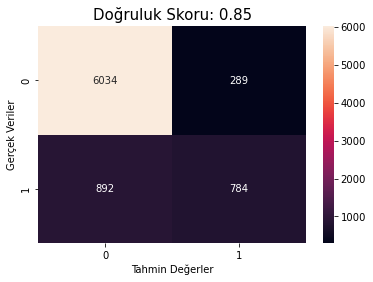

In [86]:
predictions = Karar_Ağacı.predict(x_test)
score = round(accuracy_score(y_test, predictions), 2)
KarışıklıkMatrisi = KarışıklıkMatrisi(y_test, predictions)
sns.heatmap(KarışıklıkMatrisi, annot=True, fmt=".0f")
plt.xlabel('Tahmin Değerler')
plt.ylabel('Gerçek Veriler')
plt.title('Doğruluk Skoru: {0}'.format(score), size = 15)
plt.show()

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Kayıp Olmayanlar', 'Kayıp Olanlar']))

                  precision    recall  f1-score   support

Kayıp Olmayanlar       0.87      0.95      0.91      6323
   Kayıp Olanlar       0.73      0.47      0.57      1676

        accuracy                           0.85      7999
       macro avg       0.80      0.71      0.74      7999
    weighted avg       0.84      0.85      0.84      7999



In [88]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state=42,min_weight_fraction_leaf=0.0)
clf = clf.fit(x, y)

[Text(202.275, 195.696, 'X[2] <= 44.5\ngini = 0.329\nsamples = 9410\nvalue = [7457, 1953]'),
 Text(111.60000000000001, 152.208, 'X[4] <= 2.5\ngini = 0.22\nsamples = 7625\nvalue = [6667, 958]'),
 Text(55.800000000000004, 108.72, 'X[4] <= 1.5\ngini = 0.2\nsamples = 7469\nvalue = [6626, 843]'),
 Text(27.900000000000002, 65.232, 'X[2] <= 38.5\ngini = 0.294\nsamples = 3705\nvalue = [3043, 662]'),
 Text(13.950000000000001, 21.744, 'gini = 0.231\nsamples = 2652\nvalue = [2298, 354]'),
 Text(41.85, 21.744, 'gini = 0.414\nsamples = 1053\nvalue = [745, 308]'),
 Text(83.7, 65.232, 'X[3] <= 1884.345\ngini = 0.092\nsamples = 3764\nvalue = [3583, 181]'),
 Text(69.75, 21.744, 'gini = 0.046\nsamples = 2159\nvalue = [2108, 51]'),
 Text(97.65, 21.744, 'gini = 0.149\nsamples = 1605\nvalue = [1475, 130]'),
 Text(167.4, 108.72, 'X[3] <= 55948.91\ngini = 0.387\nsamples = 156\nvalue = [41, 115]'),
 Text(139.5, 65.232, 'X[2] <= 42.5\ngini = 0.498\nsamples = 68\nvalue = [32, 36]'),
 Text(125.55000000000001, 21

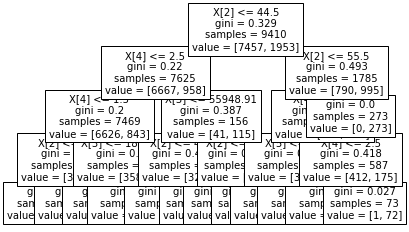

In [89]:
tree.plot_tree(clf,fontsize=10) 

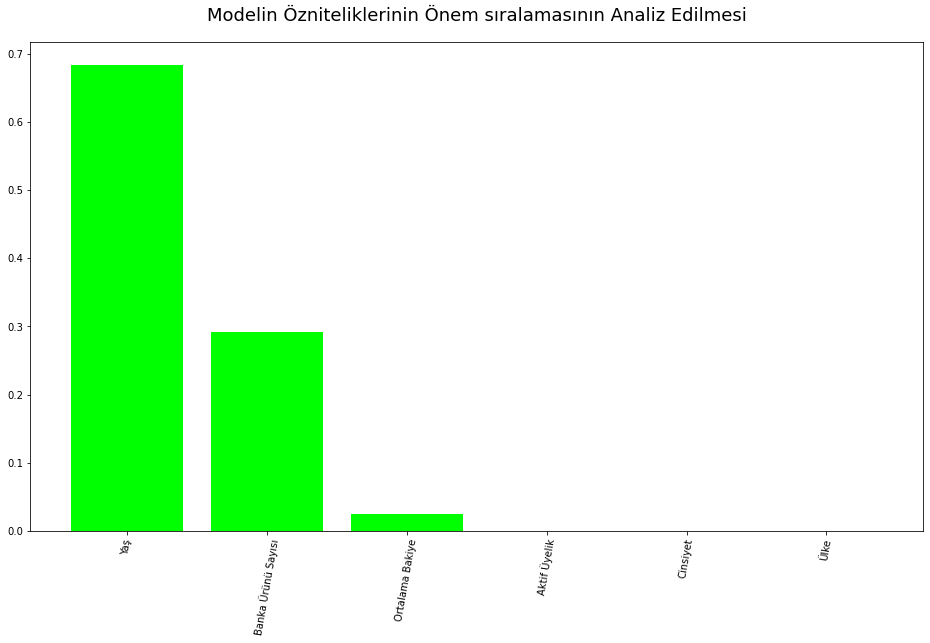

In [90]:
plt.figure(figsize=(16, 9))

from sklearn import ensemble

Karar_Ağacı2 = DecisionTreeClassifier(max_depth = 4, random_state=42)
Karar_Ağacı2.fit(x_train, y_train)
ranking = Karar_Ağacı2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = x.columns

plt.title("Modelin Özniteliklerinin Önem sıralamasının Analiz Edilmesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

# 4.3. KNN(En Yakın Komşu)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
error = []


for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Ortalama Hata')

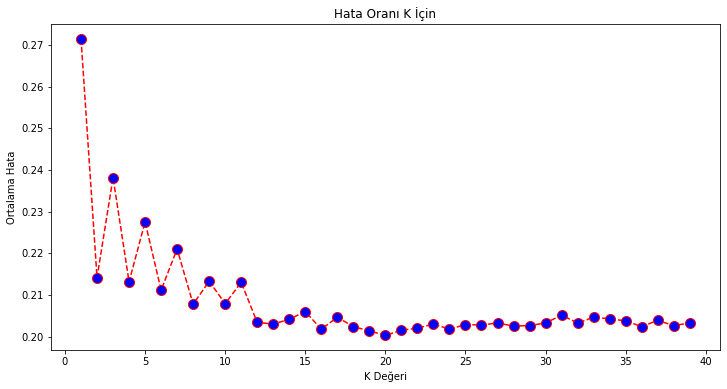

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Hata Oranı K İçin')
plt.xlabel('K Değeri')
plt.ylabel('Ortalama Hata')

In [93]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
y_pred = KNN.predict(x_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5337  986]
 [1185  491]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6323
           1       0.33      0.29      0.31      1676

    accuracy                           0.73      7999
   macro avg       0.58      0.57      0.57      7999
weighted avg       0.72      0.73      0.72      7999



# 5.Sınıflandırma Algoritmalarının Performanslarının Kıyaslanması


Sınıflandırma Modelinin Performansı için Auc-Roc grafiği kullanacağız.

KNN: ROC AUC=0.716
Navy Bayes Gaussian: ROC AUC=0.854
Karar Ağacı: ROC AUC=0.784
Logistic Regresyon: ROC AUC=0.900


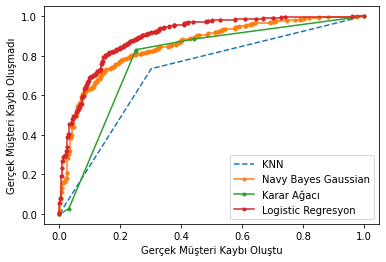

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.85, random_state=42)
KNN_tahmin = [0 for _ in range(len(testy))]
NBG_tahmin = [0 for _ in range(len(testy))]
Karar_Ağacı_tahmin = [0 for _ in range(len(testy))]
Logistic_Regression_tahmin = [0 for _ in range(len(testy))]

model = NBG
model.fit(trainx, trainy)
model2 = KNN
model2.fit(trainx, trainy)
model3=Karar_Ağacı
model3.fit(trainx, trainy)
model4=Logistic_Regression
model4.fit(trainx, trainy)

NBG_tahmin = model.predict_proba(testx)
KNN_tahmin = model2.predict_proba(testx)
Karar_Ağacı_tahmin = model3.predict_proba(testx)
Logistic_Regression_tahmin= model4.predict_proba(testx)

NBG_tahmin = NBG_tahmin[:, 1]
KNN_tahmin = KNN_tahmin[:, 1]
Karar_Ağacı_tahmin = Karar_Ağacı_tahmin[:, 1]
Logistic_Regression_tahmin = Logistic_Regression_tahmin[:, 1]

KNN_hassasiyet = roc_auc_score(testy, KNN_tahmin)
NBG_hassasiyet = roc_auc_score(testy, NBG_tahmin)
Karar_Ağacı_hassasiyet = roc_auc_score(testy, Karar_Ağacı_tahmin)
Logistic_Regression_hassasiyet = roc_auc_score(testy, Logistic_Regression_tahmin)

print('KNN: ROC AUC=%.3f' % (KNN_hassasiyet))
print('Navy Bayes Gaussian: ROC AUC=%.3f' % (NBG_hassasiyet))
print('Karar Ağacı: ROC AUC=%.3f' % (Karar_Ağacı_hassasiyet))
print('Logistic Regresyon: ROC AUC=%.3f' % (Logistic_Regression_hassasiyet))

KNN_fpr, KNN_tpr, _ = roc_curve(testy, KNN_tahmin)
NBG_fpr, NBG_tpr, _ = roc_curve(testy, NBG_tahmin)
Karar_Ağacı_fpr, Karar_Ağacı_tpr, _ = roc_curve(testy, Karar_Ağacı_tahmin)
Logistic_Regression_fpr, Logistic_Regression_tpr, _ = roc_curve(testy, Logistic_Regression_tahmin)

pyplot.plot(KNN_fpr, KNN_tpr, linestyle='--', label='KNN')
pyplot.plot(NBG_fpr, NBG_tpr, marker='.', label='Navy Bayes Gaussian')
pyplot.plot(Karar_Ağacı_fpr, Karar_Ağacı_tpr, marker='.', label='Karar Ağacı')
pyplot.plot(Logistic_Regression_fpr, Logistic_Regression_tpr, marker='.', label='Logistic Regresyon')

pyplot.xlabel('Gerçek Müşteri Kaybı Oluştu')
pyplot.ylabel('Gerçek Müşteri Kaybı Oluşmadı')

pyplot.legend()

pyplot.show()

Analizimiz için seçilen algoritma Logistic Regression olmuştur.

# 6.Sonuç 

-Müşteri kaybını çeşitli analizler kullanılarak önceden tahim etmek ve bu sayede bankayı müşteri kaybı oluşmadan uyarmak mümkündür.

-Analiz ettiğimiz veri tabanı için seçilen en uygun algoritma Logistic Regresyondur.

-Lojistik regresyon analizimizin sonucunda %84 başarılı tahmin skoru elde ettik.

-Müşteri kaybına sebep olan faktörlerde kredi puanının düşük olması ve yaş seviyesinin ya çok yüksek ya da çok düşük olması yer almaktadır.

-Bu faktörleri takip eden diğer bir faktör ise banka ürün sayısıdır. Yani kullanıcı bu bankadan fazla ürüne sahipse (örn: kredi kartlarının sayısı) müşteriler kaybedilmeye başlanmıştır.